## Data Cleaning & Transformation
 This notebook demonstrates a clean approach to:
 - Load and clean the dataset
 - Handle missing values
 - Convert categorical variables to numeric codes
 - Normalize numeric features (income, purchase_amount)
 - Visualize data distributions
 - Save the cleaned dataset

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Define DataCleaner class
class DataCleaner:
    def __init__(self, filepath: str):
        self.filepath = filepath
        self.data = None

    def load_data(self):
        """
        Load CSV data, retain 'customer_id' as the index, and parse 'signup_date' as a datetime.
        Convert columns into relevant types.
        """
        self.data = pd.read_csv(self.filepath, parse_dates=['signup_date'], index_col='customer_id')
        # Convert numeric columns explicitly
        self.data['age'] = pd.to_numeric(self.data['age'], errors='coerce')
        self.data['income'] = pd.to_numeric(self.data['income'], errors='coerce')
        self.data['purchase_amount'] = pd.to_numeric(self.data['purchase_amount'], errors='coerce')
        print("Data loaded successfully with customer_id as index!")
        return self.data

    def handle_missing_values(self):
        """
        Handle missing values:
        - Numeric columns: compute skewness and fill missing values with the median.
        - For categorical columns: if column is 'city', fill missing with 'Unknown'; for other columns, fill with mode.
        - Date column (signup_date): fill missing using forward fill then backward fill.
        """
        # Process numeric columns using median (robust to outliers)
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            skewness = self.data[col].skew()
            if abs(skewness) > 1:
                print(f"Column '{col}' is skewed (skewness={skewness:.2f}); using median for imputation.")
            median_val = self.data[col].median()
            self.data[col] = self.data[col].fillna(median_val)
        
        # Process categorical columns
        for col in self.data.select_dtypes(include=['object']).columns:
            if col.lower() == 'city':
                self.data[col] = self.data[col].fillna("Unknown")
                print(f"Column '{col}' missing values filled with 'Unknown'.")
            else:
                mode_val = self.data[col].mode()[0]
                self.data[col] = self.data[col].fillna(mode_val)
                print(f"Column '{col}' missing values filled with mode: {mode_val}.")
        
        # Process the date column: fill missing dates using forward and backward fill.
        if self.data['signup_date'].isnull().sum() > 0:
            self.data['signup_date'] = self.data['signup_date'].ffill().bfill()
            print("Missing dates in 'signup_date' filled using forward and backward fill.")

        print("All missing values have been handled.")
        return self.data

    def convert_categorical(self, column: str):
        """
        Convert a categorical column to numerical codes.
        """
        self.data[column] = self.data[column].astype('category').cat.codes
        print(f"Converted column '{column}' to numerical codes.")
        return self.data

    def normalize_columns(self, columns: list):
        """
        Normalize specified numeric columns to a 0-1 range using MinMax scaling.
        """
        scaler = MinMaxScaler()
        self.data[columns] = scaler.fit_transform(self.data[columns])
        print("Normalization complete for columns:", columns)
        return self.data

    def visualize_data(self):
        """
        Generate histograms for all columns to visualize data distribution.
        """
        self.data.hist(figsize=(10, 8))
        plt.tight_layout()
        plt.show()

    def save_data(self, output_file: str):
        """
        Save the cleaned DataFrame to a CSV file, preserving the index and data types.
        """
        self.data.to_csv(output_file)
        print(f"Cleaned data saved to {output_file}")


Data loaded successfully with customer_id as index!
Column 'age' is skewed (skewness=1.63); using median for imputation.
Column 'name' missing values filled with mode: Emma Brown.
Column 'city' missing values filled with 'Unknown'.
Missing dates in 'signup_date' filled using forward and backward fill.
All missing values have been handled.
Converted column 'city' to numerical codes.
Normalization complete for columns: ['income', 'purchase_amount']


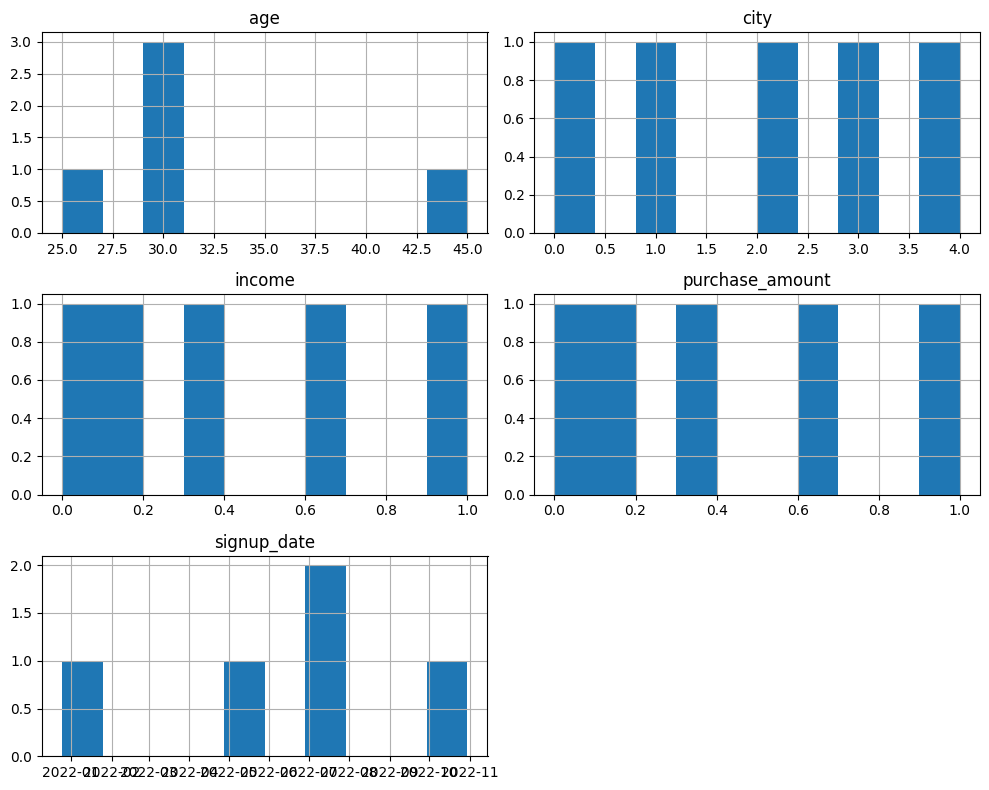

Cleaned data saved to ../data/cleaned_data.csv


In [7]:
# Usage
if __name__ == '__main__':
    cleaner = DataCleaner('../data/customer_data.csv')
    cleaner.load_data()
    cleaner.handle_missing_values()
    cleaner.convert_categorical('city')
    cleaner.normalize_columns(['income', 'purchase_amount'])
    cleaner.visualize_data()
    cleaner.save_data('../data/cleaned_data.csv')
